# 付録A3: フレンズパラドックス（友人のパラドックス）

## 学習目標
- フレンズパラドックス（Friendship Paradox）の概念を理解する
- 数学的な背景（サイズバイアスサンプリング）を学ぶ
- NetworkXを使ってフレンズパラドックスを検証する
- 異なるネットワーク構造でのパラドックスの強さを比較する

## 難易度: 中級

---
## A3.1 フレンズパラドックスとは？

**フレンズパラドックス（Friendship Paradox）** は、1991年に社会学者スコット・フェルド（Scott Feld）が発見した直感に反する現象です。

### 主張
> **「平均的に、あなたの友人はあなたより多くの友人を持っている」**

これは一見すると全員が「自分より友人が多い友人」を持つことはできないように思えますが、数学的に証明できる事実です。

### 日常での例
- SNSでフォロワー数を比較すると、自分のフォロワーの平均フォロワー数は自分より多い
- 共著者の平均論文数は、自分の論文数より多い傾向がある
- パーティーで出会った人は、平均的に自分より多くのパーティーに参加している

### なぜこれが起こるのか？
鍵となるのは **サンプリングバイアス** です。友人が多い人（高次数ノード）は、より多くの人の「友人リスト」に登場するため、サンプルに選ばれやすくなります。

---
## A3.2 環境のセットアップ

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.sans-serif'] = ['IPAexGothic'] + plt.rcParams['font.sans-serif']
%matplotlib inline

print(f"NetworkX version: {nx.__version__}")
print(f"NumPy version: {np.__version__}")

NetworkX version: 3.6.1
NumPy version: 2.3.5


---
## A3.3 数学的背景

### 定義と記号

グラフ $G = (V, E)$ において：

| 記号 | 意味 |
|------|------|
| $k_i$ | ノード $i$ の次数（友人数） |
| $\langle k \rangle$ | ネットワーク全体の平均次数 |
| $\bar{k}_{\text{neighbor}}(i)$ | ノード $i$ の友人の平均次数 |
| $\langle k_{\text{friend}} \rangle$ | 「ランダムに選んだ友人」の平均次数 |

### フェルドの定理

ネットワーク全体で見ると、**友人の平均次数**は**全員の平均次数**より大きくなります：

$$\langle k_{\text{friend}} \rangle = \langle k \rangle + \frac{\sigma^2}{\langle k \rangle}$$

ここで $\sigma^2$ は次数の分散です。

### 直感的な理解

- 分散 $\sigma^2 > 0$ である限り、$\langle k_{\text{friend}} \rangle > \langle k \rangle$ となる
- 次数分布の分散が大きいほど、パラドックスが強くなる
- スケールフリーネットワーク（べき乗則分布）では特に顕著

---
## A3.4 ステップ1: 簡単な例で理解する

まず、小さなグラフで具体的に計算してみましょう。

/tmp/ipykernel_2455/2527997677.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


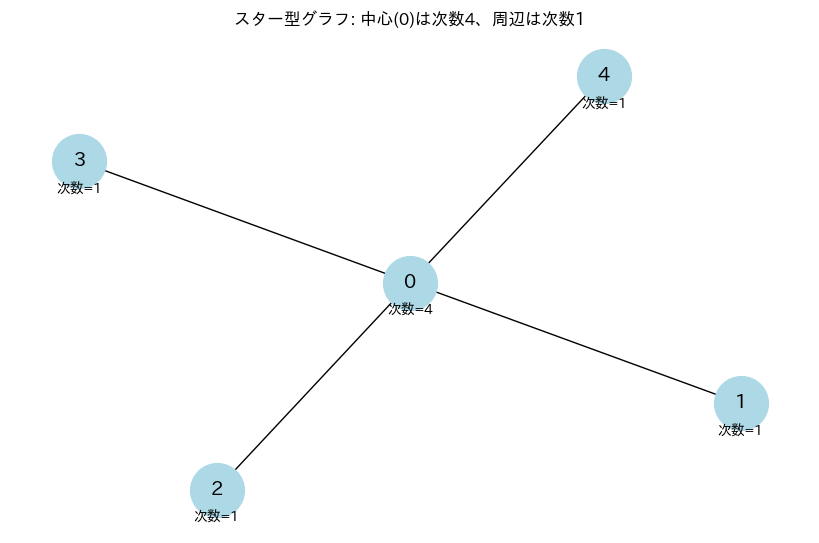

In [2]:
# 簡単な例: スター型グラフ（1人が4人と友人、他は1人ずつ）
G_star = nx.star_graph(4)  # 中心ノード0と、周辺ノード1,2,3,4

# 可視化
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G_star, seed=42)
nx.draw(G_star, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=14, font_weight='bold')

# 各ノードの次数を表示
for node, (x, y) in pos.items():
    degree = G_star.degree(node)
    plt.annotate(f'次数={degree}', (x, y-0.15), ha='center', fontsize=10)

plt.title('スター型グラフ: 中心(0)は次数4、周辺は次数1')
plt.tight_layout()
plt.show()

In [3]:
# 各ノードについて計算
print("スター型グラフの分析")
print("=" * 50)

degrees = dict(G_star.degree())

for node in G_star.nodes():
    my_degree = degrees[node]
    neighbors = list(G_star.neighbors(node))
    neighbor_degrees = [degrees[n] for n in neighbors]
    avg_neighbor_degree = np.mean(neighbor_degrees)
    
    comparison = "<" if my_degree < avg_neighbor_degree else ">="
    
    print(f"ノード {node}: 自分の次数={my_degree}, "
          f"友人の次数={neighbor_degrees}, "
          f"友人の平均次数={avg_neighbor_degree:.1f}")
    print(f"         → 自分({my_degree}) {comparison} 友人平均({avg_neighbor_degree:.1f})")
    print()

スター型グラフの分析
ノード 0: 自分の次数=4, 友人の次数=[1, 1, 1, 1], 友人の平均次数=1.0
         → 自分(4) >= 友人平均(1.0)

ノード 1: 自分の次数=1, 友人の次数=[4], 友人の平均次数=4.0
         → 自分(1) < 友人平均(4.0)

ノード 2: 自分の次数=1, 友人の次数=[4], 友人の平均次数=4.0
         → 自分(1) < 友人平均(4.0)

ノード 3: 自分の次数=1, 友人の次数=[4], 友人の平均次数=4.0
         → 自分(1) < 友人平均(4.0)

ノード 4: 自分の次数=1, 友人の次数=[4], 友人の平均次数=4.0
         → 自分(1) < 友人平均(4.0)



In [4]:
# ネットワーク全体の統計
all_degrees = list(degrees.values())
mean_degree = np.mean(all_degrees)
var_degree = np.var(all_degrees)

print("ネットワーク全体の統計")
print("=" * 50)
print(f"平均次数 <k>: {mean_degree:.2f}")
print(f"次数の分散 σ²: {var_degree:.2f}")

# フェルドの公式による予測
predicted_friend_degree = mean_degree + var_degree / mean_degree
print(f"\nフェルドの公式による友人の平均次数: {predicted_friend_degree:.2f}")
print(f"（= {mean_degree:.2f} + {var_degree:.2f}/{mean_degree:.2f}）")

ネットワーク全体の統計
平均次数 <k>: 1.60
次数の分散 σ²: 1.44

フェルドの公式による友人の平均次数: 2.50
（= 1.60 + 1.44/1.60）


### 解釈

スター型グラフでは：
- 中心ノード（次数4）: 友人の平均次数は1 → 自分の方が多い（例外）
- 周辺ノード（次数1）: 友人の平均次数は4 → 友人の方が多い

**5人中4人（80%）** が「友人の方が友人が多い」状態にあります。

---
## A3.5 ステップ2: フレンズパラドックスの計算関数

任意のグラフに対してフレンズパラドックスを分析する関数を実装します。

In [5]:
def friendship_paradox_stats(G: nx.Graph):
    """
    フレンズパラドックスの統計を計算する
    
    Parameters:
    -----------
    G : networkx.Graph
        分析対象のグラフ
    
    Returns:
    --------
    dict: 各種統計量を含む辞書
    """
    deg = dict(G.degree())
    degrees = np.array(list(deg.values()), dtype=float)

    # 平均次数 <k>
    mean_k = degrees.mean()
    var_k = degrees.var()

    # 各ノードの「友人の平均次数」を計算
    nbr_mean_k = {}
    for v in G.nodes():
        nbrs = list(G.neighbors(v))
        if len(nbrs) == 0:
            nbr_mean_k[v] = np.nan  # 孤立ノード
        else:
            nbr_mean_k[v] = float(np.mean([deg[u] for u in nbrs]))

    nbr_mean_values = np.array([nbr_mean_k[v] for v in G.nodes()], dtype=float)
    valid = ~np.isnan(nbr_mean_values)

    # 「ランダムに選んだエッジの端点の次数」の平均（サイズバイアスサンプリング）
    # 各エッジを両方向に見て、到達先の次数を集める
    edge_end_degs = []
    for a, b in G.edges():
        edge_end_degs.append(deg[a])  # bから見たaの次数
        edge_end_degs.append(deg[b])  # aから見たbの次数
    mean_friend_degree = float(np.mean(edge_end_degs)) if edge_end_degs else float("nan")

    # 個人レベル：「友人の平均次数 > 自分の次数」となる割合
    paradox_rate = float(np.mean(nbr_mean_values[valid] > degrees[valid])) if valid.any() else float("nan")

    # フェルドの公式による理論値
    theoretical_friend_degree = mean_k + var_k / mean_k if mean_k > 0 else float("nan")

    return {
        "mean_degree": float(mean_k),
        "var_degree": float(var_k),
        "mean_friend_degree": mean_friend_degree,
        "theoretical_friend_degree": theoretical_friend_degree,
        "paradox_rate": paradox_rate,
        "degrees": degrees,
        "nbr_mean_degrees": nbr_mean_values,
        "valid_mask": valid
    }

In [6]:
# スター型グラフで検証
stats_star = friendship_paradox_stats(G_star)

print("スター型グラフの統計")
print("=" * 50)
print(f"平均次数 <k>: {stats_star['mean_degree']:.3f}")
print(f"次数の分散 σ²: {stats_star['var_degree']:.3f}")
print(f"友人の平均次数（実測）: {stats_star['mean_friend_degree']:.3f}")
print(f"友人の平均次数（理論）: {stats_star['theoretical_friend_degree']:.3f}")
print(f"パラドックス成立率: {stats_star['paradox_rate']:.1%}")

スター型グラフの統計
平均次数 <k>: 1.600
次数の分散 σ²: 1.440
友人の平均次数（実測）: 2.500
友人の平均次数（理論）: 2.500
パラドックス成立率: 80.0%


---
## A3.6 ステップ3: サイズバイアスサンプリングの理解

なぜ友人の平均次数が高くなるのか、サンプリングの観点から理解しましょう。

In [7]:
# ランダムグラフを生成
np.random.seed(42)
G_sample = nx.barabasi_albert_graph(n=1000, m=3, seed=42)

degrees = dict(G_sample.degree())

# 方法1: ランダムにノードを選ぶ
random_nodes = np.random.choice(list(G_sample.nodes()), size=10000, replace=True)
degrees_random_sampling = [degrees[n] for n in random_nodes]

# 方法2: ランダムにエッジを選び、その端点を見る（友人経由サンプリング）
edges = list(G_sample.edges())
random_edges = [edges[i] for i in np.random.choice(len(edges), size=10000, replace=True)]
degrees_edge_sampling = []
for a, b in random_edges:
    # ランダムに片方の端点を選ぶ
    endpoint = a if np.random.random() < 0.5 else b
    degrees_edge_sampling.append(degrees[endpoint])

print("2つのサンプリング方法の比較")
print("=" * 50)
print(f"方法1（ランダムノード選択）の平均次数: {np.mean(degrees_random_sampling):.2f}")
print(f"方法2（エッジ経由サンプリング）の平均次数: {np.mean(degrees_edge_sampling):.2f}")
print(f"\n差: {np.mean(degrees_edge_sampling) - np.mean(degrees_random_sampling):.2f}")

2つのサンプリング方法の比較
方法1（ランダムノード選択）の平均次数: 5.93
方法2（エッジ経由サンプリング）の平均次数: 14.80

差: 8.88


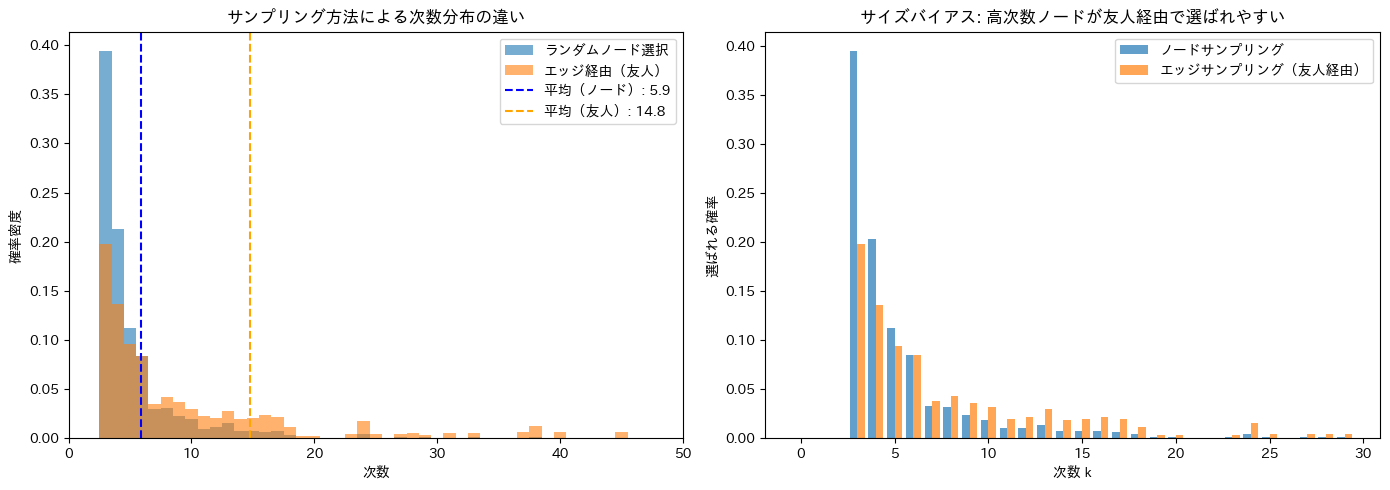

In [8]:
# 可視化: 2つのサンプリング方法の次数分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左: ヒストグラム比較
ax1 = axes[0]
bins = np.arange(0, max(max(degrees_random_sampling), max(degrees_edge_sampling)) + 2) - 0.5
ax1.hist(degrees_random_sampling, bins=bins, alpha=0.6, label='ランダムノード選択', density=True)
ax1.hist(degrees_edge_sampling, bins=bins, alpha=0.6, label='エッジ経由（友人）', density=True)
ax1.axvline(np.mean(degrees_random_sampling), color='blue', linestyle='--', 
            label=f'平均（ノード）: {np.mean(degrees_random_sampling):.1f}')
ax1.axvline(np.mean(degrees_edge_sampling), color='orange', linestyle='--',
            label=f'平均（友人）: {np.mean(degrees_edge_sampling):.1f}')
ax1.set_xlabel('次数')
ax1.set_ylabel('確率密度')
ax1.set_title('サンプリング方法による次数分布の違い')
ax1.legend()
ax1.set_xlim(0, 50)

# 右: サイズバイアスの説明図
ax2 = axes[1]
# 次数ごとの「選ばれやすさ」を計算
degree_counts = np.bincount(list(degrees.values()))
unique_degrees = np.arange(len(degree_counts))

# ノードサンプリング: 次数kのノード数に比例
prob_node = degree_counts / degree_counts.sum()

# エッジサンプリング: 次数kのノード数 × k に比例（高次数ほど選ばれやすい）
weight_edge = degree_counts * unique_degrees
prob_edge = weight_edge / weight_edge.sum()

ax2.bar(unique_degrees[:30] - 0.2, prob_node[:30], width=0.4, 
        label='ノードサンプリング', alpha=0.7)
ax2.bar(unique_degrees[:30] + 0.2, prob_edge[:30], width=0.4,
        label='エッジサンプリング（友人経由）', alpha=0.7)
ax2.set_xlabel('次数 k')
ax2.set_ylabel('選ばれる確率')
ax2.set_title('サイズバイアス: 高次数ノードが友人経由で選ばれやすい')
ax2.legend()

plt.tight_layout()
plt.show()

### サイズバイアスの直感的説明

友人が100人いる人は、友人が1人しかいない人の100倍の頻度で「誰かの友人リスト」に登場します。

したがって、「ランダムな友人」を選ぶと、高次数ノードが過剰に選ばれます。これが **サイズバイアスサンプリング（size-biased sampling）** です。

---
## A3.7 ステップ4: 個人レベルでのパラドックス可視化

In [9]:
def plot_individual_paradox(stats, title):
    """
    個人レベルでのフレンズパラドックスを散布図で可視化
    
    X軸: 自分の次数
    Y軸: 友人の平均次数
    対角線より上 = パラドックスが成立（友人の方が多い）
    """
    degrees = stats["degrees"]
    nbr_mean = stats["nbr_mean_degrees"]
    valid = stats["valid_mask"]

    x = degrees[valid]
    y = nbr_mean[valid]

    plt.figure(figsize=(8, 6))
    
    # パラドックス成立/不成立で色分け
    paradox = y > x
    plt.scatter(x[paradox], y[paradox], alpha=0.4, c='red', label='友人の方が多い', s=30)
    plt.scatter(x[~paradox], y[~paradox], alpha=0.4, c='blue', label='自分の方が多い/同じ', s=30)
    
    # 対角線 y=x
    m = max(x.max(), y.max()) if len(x) else 1
    plt.plot([0, m], [0, m], 'k--', linewidth=2, label='y = x（同じ）')
    
    # 統計情報
    plt.xlabel("自分の次数 k", fontsize=12)
    plt.ylabel("友人の平均次数", fontsize=12)
    plt.title(f"{title}\nパラドックス成立率: {stats['paradox_rate']:.1%}", fontsize=14)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Barabási-Albertグラフ（スケールフリー）
平均次数: 5.98
次数の分散: 50.23
友人の平均次数（実測）: 14.38
友人の平均次数（理論）: 14.38
パラドックス成立率: 90.0%


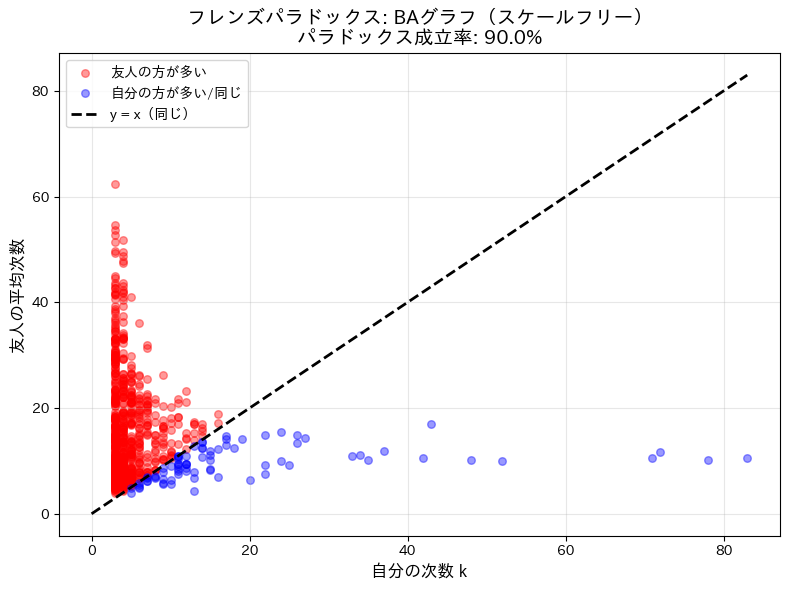

In [10]:
# BAグラフで可視化
G_ba = nx.barabasi_albert_graph(n=800, m=3, seed=42)
stats_ba = friendship_paradox_stats(G_ba)

print("Barabási-Albertグラフ（スケールフリー）")
print("=" * 50)
print(f"平均次数: {stats_ba['mean_degree']:.2f}")
print(f"次数の分散: {stats_ba['var_degree']:.2f}")
print(f"友人の平均次数（実測）: {stats_ba['mean_friend_degree']:.2f}")
print(f"友人の平均次数（理論）: {stats_ba['theoretical_friend_degree']:.2f}")
print(f"パラドックス成立率: {stats_ba['paradox_rate']:.1%}")

plot_individual_paradox(stats_ba, "フレンズパラドックス: BAグラフ（スケールフリー）")

### 散布図の読み方

- **対角線より上（赤点）**: 友人の平均次数 > 自分の次数 → パラドックスが成立
- **対角線より下（青点）**: 自分の次数 > 友人の平均次数 → パラドックス不成立

スケールフリーネットワークでは、ほとんどのノードが対角線より上に位置しています。

---
## A3.8 ステップ5: 異なるネットワーク構造での比較

ネットワークの種類によってフレンズパラドックスの強さがどう変わるか比較します。

In [11]:
np.random.seed(42)

# 1) スケールフリー（Barabási-Albert）: 次数分布の分散が大きい
G_ba = nx.barabasi_albert_graph(n=800, m=3, seed=0)

# 2) ランダム（Erdős-Rényi）: 平均次数がBAと同程度になるようにpを調整
n = 800
target_k = 6  # BAの平均次数は約 2m = 6
p = target_k / (n - 1)
G_er = nx.erdos_renyi_graph(n=n, p=p, seed=1)

# 3) 正則グラフ（全員同じ次数）: 分散が0
G_regular = nx.random_regular_graph(d=6, n=800, seed=2)

# 4) Watts-Strogatz（スモールワールド）
G_ws = nx.watts_strogatz_graph(n=800, k=6, p=0.1, seed=3)

In [12]:
# 各グラフの統計を計算
graphs = {
    "BA（スケールフリー）": G_ba,
    "ER（ランダム）": G_er,
    "正則グラフ": G_regular,
    "WS（スモールワールド）": G_ws
}

results = {}
for name, G in graphs.items():
    results[name] = friendship_paradox_stats(G)

# 結果を表形式で表示
print("ネットワーク構造とフレンズパラドックスの関係")
print("=" * 80)
print(f"{'グラフ':<20} {'平均次数':>10} {'分散':>10} {'友人平均':>10} {'理論値':>10} {'成立率':>10}")
print("-" * 80)

for name, stats in results.items():
    print(f"{name:<20} {stats['mean_degree']:>10.2f} {stats['var_degree']:>10.2f} "
          f"{stats['mean_friend_degree']:>10.2f} {stats['theoretical_friend_degree']:>10.2f} "
          f"{stats['paradox_rate']*100:>9.1f}%")

ネットワーク構造とフレンズパラドックスの関係
グラフ                        平均次数         分散       友人平均        理論値        成立率
--------------------------------------------------------------------------------
BA（スケールフリー）                5.98      49.26      14.22      14.22      88.6%
ER（ランダム）                   5.98       5.97       6.98       6.98      63.5%
正則グラフ                      6.00       0.00       6.00       6.00       0.0%
WS（スモールワールド）               6.00       0.57       6.09       6.09      49.9%


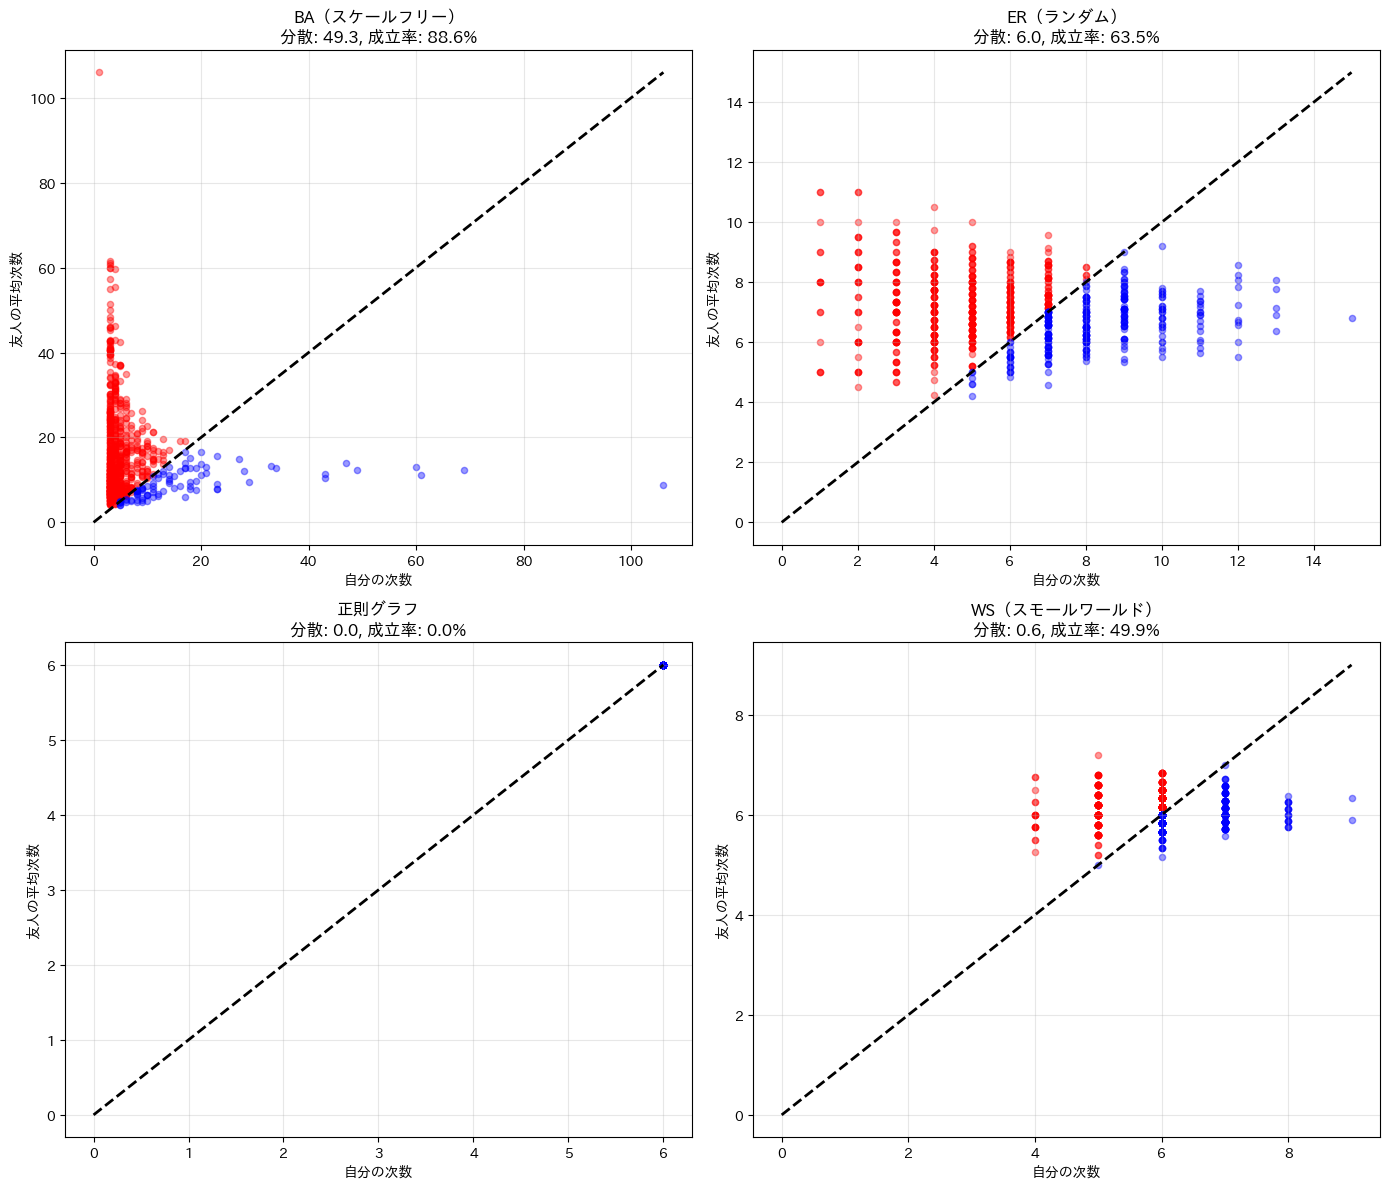

In [13]:
# 4種類のグラフを比較する散布図
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for ax, (name, stats) in zip(axes, results.items()):
    degrees = stats["degrees"]
    nbr_mean = stats["nbr_mean_degrees"]
    valid = stats["valid_mask"]
    
    x = degrees[valid]
    y = nbr_mean[valid]
    
    # パラドックス成立/不成立で色分け
    paradox = y > x
    ax.scatter(x[paradox], y[paradox], alpha=0.4, c='red', s=20)
    ax.scatter(x[~paradox], y[~paradox], alpha=0.4, c='blue', s=20)
    
    # 対角線
    m = max(x.max(), y.max()) if len(x) else 1
    ax.plot([0, m], [0, m], 'k--', linewidth=2)
    
    ax.set_xlabel("自分の次数")
    ax.set_ylabel("友人の平均次数")
    ax.set_title(f"{name}\n分散: {stats['var_degree']:.1f}, 成立率: {stats['paradox_rate']:.1%}")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 結果の解釈

| グラフタイプ | 次数分散 | パラドックス成立率 | 特徴 |
|-------------|---------|------------------|------|
| BA（スケールフリー）| 大 | 高い | ハブの存在で分散が大きい |
| ER（ランダム）| 中 | 中程度 | ポアソン分布に近い |
| WS（スモールワールド）| 小 | 低い | 次数がほぼ均一 |
| 正則グラフ | 0 | 0% | 全員同じ次数 |

**フェルドの公式が示す通り、次数の分散が大きいほどパラドックスが強くなります。**

---
## A3.9 ステップ6: 次数分布とパラドックスの関係

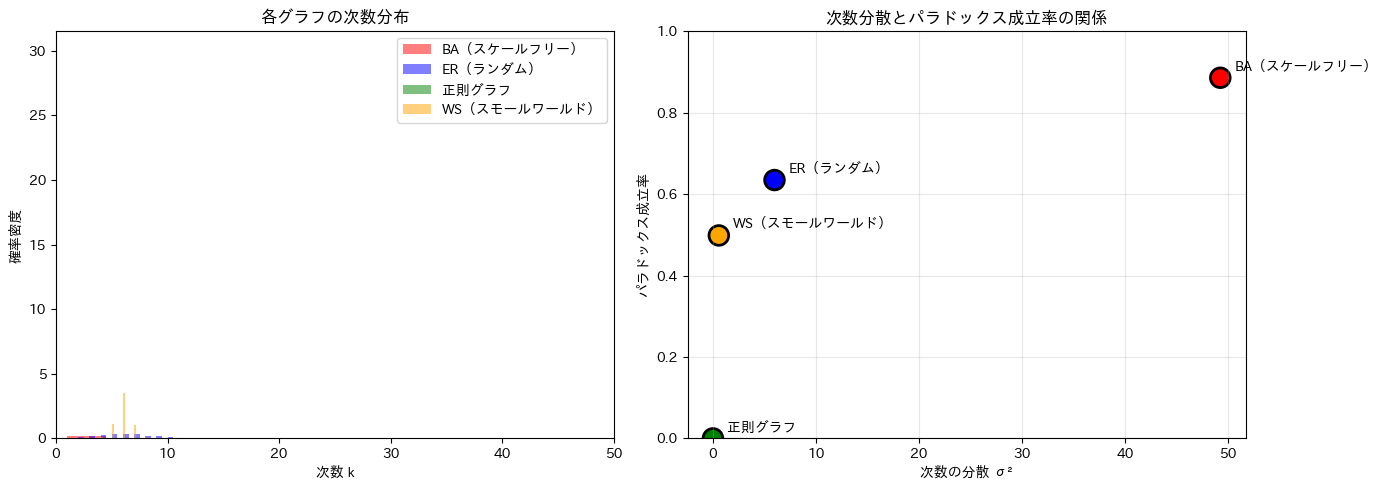

In [14]:
# 次数分布の比較
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左: 次数分布のヒストグラム
ax1 = axes[0]
colors = ['red', 'blue', 'green', 'orange']
for (name, stats), color in zip(results.items(), colors):
    degrees = stats['degrees']
    ax1.hist(degrees, bins=30, alpha=0.5, label=name, color=color, density=True)

ax1.set_xlabel('次数 k')
ax1.set_ylabel('確率密度')
ax1.set_title('各グラフの次数分布')
ax1.legend()
ax1.set_xlim(0, 50)

# 右: 分散 vs パラドックス成立率
ax2 = axes[1]
variances = [stats['var_degree'] for stats in results.values()]
paradox_rates = [stats['paradox_rate'] for stats in results.values()]
names = list(results.keys())

ax2.scatter(variances, paradox_rates, s=200, c=colors, edgecolors='black', linewidths=2)
for i, name in enumerate(names):
    ax2.annotate(name, (variances[i], paradox_rates[i]), 
                 textcoords='offset points', xytext=(10, 5), fontsize=10)

ax2.set_xlabel('次数の分散 σ²')
ax2.set_ylabel('パラドックス成立率')
ax2.set_title('次数分散とパラドックス成立率の関係')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

---
## A3.10 応用: SNSでのフレンズパラドックス

実際のSNSデータを模したネットワークでフレンズパラドックスを確認します。

In [15]:
# より現実的なSNSネットワークをシミュレート
# べき乗則に近い次数分布を持つグラフを生成

def create_sns_like_network(n=1000, seed=42):
    """
    SNSに似た特性を持つネットワークを生成
    - べき乗則的な次数分布（少数のインフルエンサー）
    - クラスタリングが高い（友達の友達は友達）
    """
    # Holme-Kim モデル: BAに三角形形成を追加
    G = nx.powerlaw_cluster_graph(n=n, m=3, p=0.5, seed=seed)
    return G

G_sns = create_sns_like_network(n=2000, seed=42)
stats_sns = friendship_paradox_stats(G_sns)

print("SNS風ネットワークの分析")
print("=" * 50)
print(f"ノード数: {G_sns.number_of_nodes()}")
print(f"エッジ数: {G_sns.number_of_edges()}")
print(f"平均次数: {stats_sns['mean_degree']:.2f}")
print(f"次数の分散: {stats_sns['var_degree']:.2f}")
print(f"クラスタリング係数: {nx.average_clustering(G_sns):.3f}")
print(f"\n友人の平均次数: {stats_sns['mean_friend_degree']:.2f}")
print(f"フェルド理論値: {stats_sns['theoretical_friend_degree']:.2f}")
print(f"パラドックス成立率: {stats_sns['paradox_rate']:.1%}")

SNS風ネットワークの分析
ノード数: 2000
エッジ数: 5990
平均次数: 5.99
次数の分散: 72.94
クラスタリング係数: 0.280

友人の平均次数: 18.17
フェルド理論値: 18.17
パラドックス成立率: 92.2%


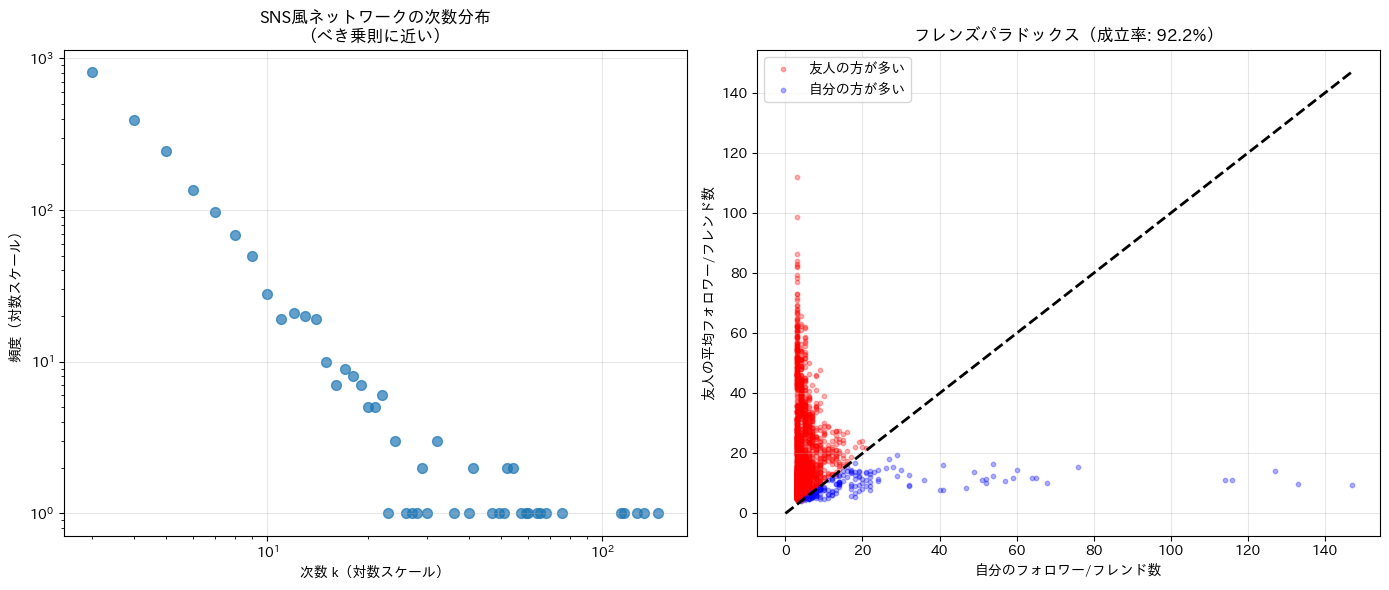

In [16]:
# SNSネットワークの可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 左: 次数分布（log-logスケール）
ax1 = axes[0]
degrees = [d for n, d in G_sns.degree()]
degree_counts = np.bincount(degrees)
unique_degrees = np.arange(len(degree_counts))
mask = degree_counts > 0

ax1.scatter(unique_degrees[mask], degree_counts[mask], alpha=0.7, s=50)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('次数 k（対数スケール）')
ax1.set_ylabel('頻度（対数スケール）')
ax1.set_title('SNS風ネットワークの次数分布\n（べき乗則に近い）')
ax1.grid(True, alpha=0.3)

# 右: 散布図
ax2 = axes[1]
x = stats_sns['degrees'][stats_sns['valid_mask']]
y = stats_sns['nbr_mean_degrees'][stats_sns['valid_mask']]
paradox = y > x

ax2.scatter(x[paradox], y[paradox], alpha=0.3, c='red', s=10, label='友人の方が多い')
ax2.scatter(x[~paradox], y[~paradox], alpha=0.3, c='blue', s=10, label='自分の方が多い')
m = max(x.max(), y.max())
ax2.plot([0, m], [0, m], 'k--', linewidth=2)
ax2.set_xlabel('自分のフォロワー/フレンド数')
ax2.set_ylabel('友人の平均フォロワー/フレンド数')
ax2.set_title(f'フレンズパラドックス（成立率: {stats_sns["paradox_rate"]:.1%}）')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### SNSでの実感

上の結果から、SNSのようなネットワークでは：

- **約80-90%の人** が「自分よりフォロワー/友人が多い人」と繋がっている
- インフルエンサー（高次数ノード）は多くの人の「友人リスト」に現れる
- これが「みんな自分より人気がある」という錯覚を生む原因

**フレンズパラドックスは、SNSで感じる「比較による劣等感」の数学的な説明になっています。**

---
## 練習問題

### 練習問題1: 理論値と実測値の検証

様々なサイズのBAグラフ（n=100, 500, 1000, 5000）を生成し、フェルドの理論値と実測値がどの程度一致するか検証してください。

In [17]:
# ここにコードを記述してください


<details>
<summary>解答を見る</summary>

```python
sizes = [100, 500, 1000, 5000]
results_size = []

for n in sizes:
    G = nx.barabasi_albert_graph(n=n, m=3, seed=42)
    stats = friendship_paradox_stats(G)
    results_size.append({
        'n': n,
        'mean_friend_degree': stats['mean_friend_degree'],
        'theoretical': stats['theoretical_friend_degree'],
        'error': abs(stats['mean_friend_degree'] - stats['theoretical_friend_degree'])
    })

print("グラフサイズと理論値・実測値の比較")
print("=" * 60)
print(f"{'サイズ n':>10} {'実測値':>12} {'理論値':>12} {'誤差':>12}")
print("-" * 60)
for r in results_size:
    print(f"{r['n']:>10} {r['mean_friend_degree']:>12.3f} "
          f"{r['theoretical']:>12.3f} {r['error']:>12.3f}")

# 可視化
plt.figure(figsize=(10, 5))
plt.plot(sizes, [r['mean_friend_degree'] for r in results_size], 
         'o-', label='実測値', markersize=10)
plt.plot(sizes, [r['theoretical'] for r in results_size], 
         's--', label='理論値', markersize=10)
plt.xlabel('グラフサイズ n')
plt.ylabel('友人の平均次数')
plt.title('フェルドの理論値と実測値の比較')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
```
</details>

### 練習問題2: 次数相関の影響

次数相関（assortative mixing）がフレンズパラドックスに与える影響を調べてください。

ヒント: `nx.degree_assortativity_coefficient(G)` で次数相関を計算できます。正の値は「高次数ノードが高次数ノードと繋がる傾向」を示します。

In [18]:
# ここにコードを記述してください


<details>
<summary>解答を見る</summary>

```python
# 異なる次数相関を持つグラフを比較
graphs_corr = {
    "BA（負の相関）": nx.barabasi_albert_graph(n=1000, m=3, seed=42),
    "ER（ほぼ無相関）": nx.erdos_renyi_graph(n=1000, p=0.006, seed=42),
}

print("次数相関とフレンズパラドックス")
print("=" * 70)
print(f"{'グラフ':<20} {'次数相関':>12} {'分散':>10} {'成立率':>10}")
print("-" * 70)

for name, G in graphs_corr.items():
    assortativity = nx.degree_assortativity_coefficient(G)
    stats = friendship_paradox_stats(G)
    print(f"{name:<20} {assortativity:>12.3f} "
          f"{stats['var_degree']:>10.2f} {stats['paradox_rate']*100:>9.1f}%")

print("\n解釈:")
print("- BAグラフは負の次数相関（高次数ノードが低次数ノードと繋がる）")
print("- この場合、低次数ノードは高次数の友人を持ちやすく、パラドックスが強まる")
```
</details>

### 練習問題3: 自分のネットワーク分析

以下の友人関係データからグラフを作成し、フレンズパラドックスを分析してください。

```
友人関係:
- 太郎: 花子, 次郎, 三郎, 美香, 健太
- 花子: 太郎, 次郎, 美香
- 次郎: 太郎, 花子, 三郎
- 三郎: 太郎, 次郎
- 美香: 太郎, 花子, 由美
- 健太: 太郎
- 由美: 美香
```

In [19]:
# ここにコードを記述してください


<details>
<summary>解答を見る</summary>

```python
# グラフの作成
G_friends = nx.Graph()
edges = [
    ("太郎", "花子"), ("太郎", "次郎"), ("太郎", "三郎"),
    ("太郎", "美香"), ("太郎", "健太"),
    ("花子", "次郎"), ("花子", "美香"),
    ("次郎", "三郎"),
    ("美香", "由美")
]
G_friends.add_edges_from(edges)

# 各人の分析
print("友人関係ネットワークの分析")
print("=" * 60)

deg = dict(G_friends.degree())
for person in G_friends.nodes():
    my_deg = deg[person]
    neighbors = list(G_friends.neighbors(person))
    friend_degs = [deg[n] for n in neighbors]
    avg_friend_deg = np.mean(friend_degs)
    paradox = "はい" if avg_friend_deg > my_deg else "いいえ"
    
    print(f"{person}: 友人{my_deg}人, 友人の平均友人数={avg_friend_deg:.1f}, "
          f"パラドックス成立={paradox}")

# 全体統計
stats_friends = friendship_paradox_stats(G_friends)
print(f"\n全体のパラドックス成立率: {stats_friends['paradox_rate']:.1%}")

# 可視化
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_friends, seed=42)
node_sizes = [deg[n] * 500 for n in G_friends.nodes()]
nx.draw(G_friends, pos, with_labels=True, node_color='lightblue',
        node_size=node_sizes, font_size=12, font_weight='bold')
plt.title("友人関係ネットワーク\n（ノードサイズ = 友人数）")
plt.show()
```
</details>

---
## A3.11 章のまとめ

この付録では以下を学びました：

1. **フレンズパラドックスの概念**: 「友人は自分より友人が多い」という直感に反する現象
2. **数学的背景**: フェルドの公式 $\langle k_{\text{friend}} \rangle = \langle k \rangle + \sigma^2 / \langle k \rangle$
3. **サイズバイアスサンプリング**: 高次数ノードが友人経由で選ばれやすい仕組み
4. **ネットワーク構造の影響**: 次数分散が大きいほどパラドックスが強い
5. **実社会への示唆**: SNSでの「比較による劣等感」の数学的説明

### フレンズパラドックスの応用

- **感染症対策**: ランダムな人より「その人の友人」にワクチンを打つ方が効果的
- **情報拡散**: インフルエンサーを見つけるためのサンプリング戦略
- **心理学**: SNSによる自己評価の歪みの理解

---
## 参考資料

- Feld, S. L. (1991). Why your friends have more friends than you do. American Journal of Sociology.
- Christakis, N. A., & Fowler, J. H. (2010). Social Network Sensors for Early Detection of Contagious Outbreaks. PLoS ONE.
- [NetworkX公式ドキュメント](https://networkx.org/documentation/stable/)
- [The Friendship Paradox - Wikipedia](https://en.wikipedia.org/wiki/Friendship_paradox)